In [1]:
import numpy as np
import matplotlib.pyplot as plt
from int_field import ZSqrt2Int
import ipe_ellipse as E

In [2]:
test_G = np.array([
    [1, -1],
    [1, 1]
]) * 1/np.sqrt(2)

G = E.GridOperator(np.array([
    [ZSqrt2Int((1, 0)), ZSqrt2Int((-1, 0))],
    [ZSqrt2Int((1, 0)), ZSqrt2Int((1, 0))]
]))


init_M = np.array([
    [4, 3.87298335],
    [3.87298335, 4]
])

fin_M = np.array([
    [7.87298335, 0],
    [0, 0.12701665]
])

In [3]:
G.inverse()

GridOperator([[ZSqrt2Int((1, 0)) ZSqrt2Int((1, 0))]
 [ZSqrt2Int((-1, 0)) ZSqrt2Int((1, 0))]])

In [4]:
ellipse_matrix = np.array([
    [4, 3.87298335      ],
    [3.87298335        , 4]
])


In [5]:

ellipse_matrix = np.array([
    [7.87298335, 0.        ],
    [0.        , 0.12701665]
])

In [6]:
ellipse_matrix = init_M

In [7]:
np.isclose(np.zeros((2, 2)), np.eye(2) )

array([[False,  True],
       [ True, False]])

In [8]:
def viz_ellipse(M, f = 1):
    X_range = np.linspace(-2.5, 2.5, 100)
    Y_range = np.linspace(-2.5, 2.5, 100)

    X, Y = np.meshgrid(X_range, Y_range)
    Z = np.array([X.flatten(), Y.flatten()])
    MZ = (M/f) @ Z
    ZMZ = np.sum(Z * MZ, axis=0)
    ZMZ = ZMZ.reshape(X.shape)

    plt.contour(X, Y, ZMZ, levels=[1], colors='r')

    plt.xlim(min(X_range), max(X_range))
    plt.ylim(min(Y_range), max(Y_range))

In [9]:
import search as S

In [10]:
z = 4
e = 8
b = np.sqrt(e**2 - 1)

zeta = 0
eta = 8
beta = np.sqrt(eta**2 - 1)

In [11]:
A_ellipse = E.Ellipse.make_ellipse_from_parameters(z, e, b)
B_ellipse = E.Ellipse.make_ellipse_from_parameters(zeta, eta, beta)

G, A_prime, B_prime = S.create_upright_intervals(A_ellipse, B_ellipse)

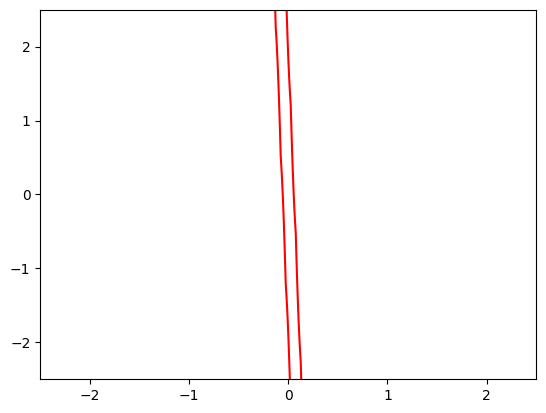

In [12]:
viz_ellipse(A_ellipse.M, A_ellipse.f)

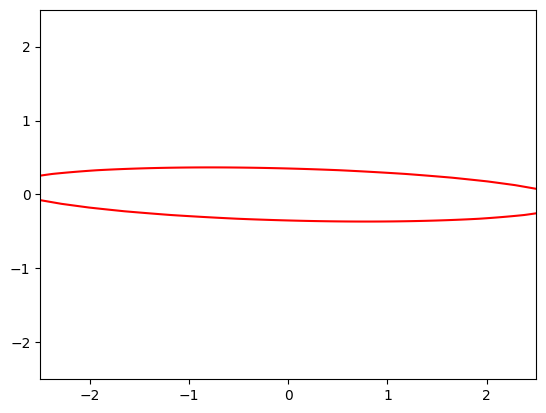

In [13]:
viz_ellipse(A_prime.M, A_prime.f)

In [14]:
# visualize the sampled points:

leader = np.sqrt(2)**6
sampled_points = S.sample_from_interval(A_prime, B_prime, rescale_factor=leader)

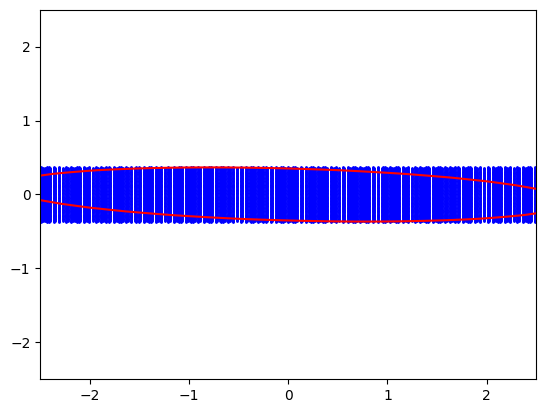

In [15]:
viz_ellipse(A_prime.M, A_prime.f)

# plot points
pts_np = np.array([[p[0].eval(), p[1].eval()] for p in sampled_points]) / leader / 2


plt.scatter(pts_np[:, 0], pts_np[:, 1], c='b', s=1)


In [16]:
# plot the transformation back
sampled_points_trans = S.sample_from_interval(A_prime, B_prime, G=G.G, rescale_factor=leader)


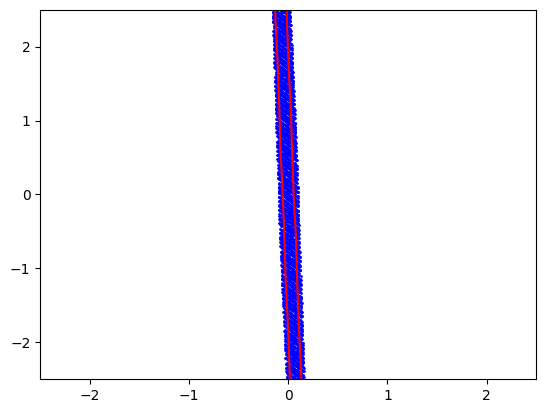

In [17]:
viz_ellipse(A_ellipse.M, A_ellipse.f)

# plot points
pts_np = np.array([[p[0].eval(), p[1].eval()] for p in sampled_points_trans]) / leader / 2


plt.scatter(pts_np[:, 0], pts_np[:, 1], c='b', s=1)


In [18]:
import ipe_ellipse

aa = ipe_ellipse.Ellipse.make_ellipse_rus(2, 0.9, 1e-5)
bb = ipe_ellipse.Ellipse(np.eye(2), (0, 0), 1)

In [19]:
aa

M: [[0.00413411 0.00189201]
 [0.00189201 0.00086589]], 
Ctr: [-0.39533949  0.86383256] 
F: 9.999999999999998e-13

In [20]:
G, aas, bbs = S.create_upright_intervals(aa, bb)

aas

M: [[0.81305186 0.12741631]
 [0.12741631 1.24990172]], 
Ctr: [-0.00425204 -0.0110921 ] 
F: 9.999999996732667e-07

In [21]:
G.eval() @ G.inverse().eval() / np.sqrt(2) @ np.array([-0.39, 0.86]).T

array([-0.55154329,  1.21622366])